<a href="https://colab.research.google.com/github/yogeshprabhakar/Janatahack-Cross-sell-Prediction/blob/main/Janatahack_Cross_sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
import category_encoders as ce
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

| Variable | Definition   |
|------|------|
|   id  | Unique ID for the customer|
|   Gender  | Gender of the customer|
|   Age  | Age of the customer|
|   Driving_License  | 0 : Customer does not have DL</br> 1 : Customer already has DL|
|   Region_Code  | Unique code for the region of the customer|
|   Previously_Insured  | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|   Vehicle_Age  | Age of the Vehicle |
|   Vehicle_Damage  | 1 : Customer got his/her vehicle damaged in the past </br> 0 : Customer didn't get his/her vehicle damaged in the past|
|   Annual_Premium  | The amount customer needs to pay as premium in the year|
|   Policy_Sales_Channel  | Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc|
|   Vintage  | Number of Days, Customer has been associated with the company|
|   Response  | 1 :  Customer is interested </br> 0 : Customer is not interested|


In [ ]:
print(df.shape)
df.head(3)

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
x = df[~df.iloc[:,1:].duplicated(keep = 'first')]
df = df[~df.id.isin(x[x.iloc[:,1:-1].duplicated(keep = False)].id)]

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df.Region_Code.nunique()

53

In [ ]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
df.Policy_Sales_Channel.nunique()

155

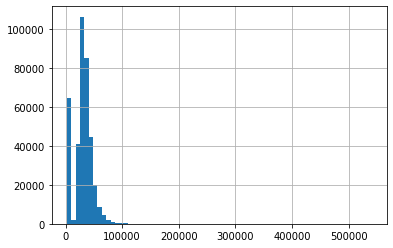

In [ ]:
df['Annual_Premium'].hist(bins = 70)

Text(0.5, 1.0, 'Response')

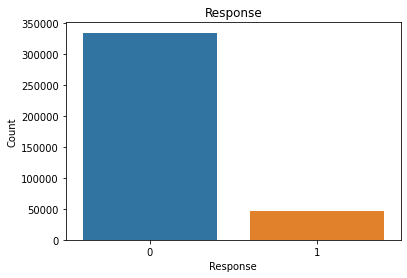

In [ ]:
response = df.loc[:,"Response"].value_counts()
plt.xlabel("Response")
plt.ylabel('Count')
sns.barplot(response.index , response.values).set_title('Response')

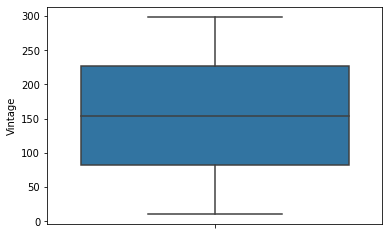

In [ ]:
sns.boxplot(y = 'Vintage', data = df, hue = 'Vehicle_Age')

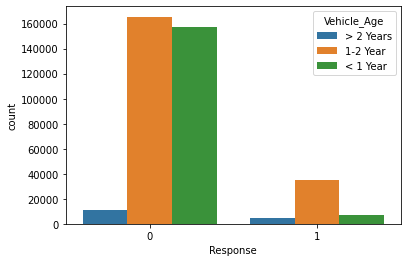

In [ ]:
# It seems policy isnt attractive for vehicle age less than or equal to 2
sns.countplot(x = 'Response', data = df, hue = 'Vehicle_Age')

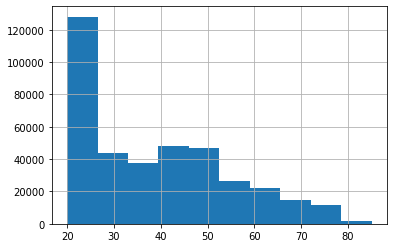

In [ ]:
df.Age.hist()

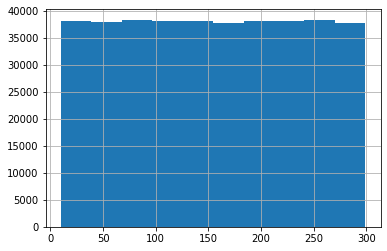

In [ ]:
df.Vintage.hist()

In [ ]:
def age_func(x):
  if x < 30: return '20-30'
  if x < 40: return '30-40'
  if x < 50: return '40-50'
  return '>50'
df['Age_bins'] = df['Age'].apply(age_func)  

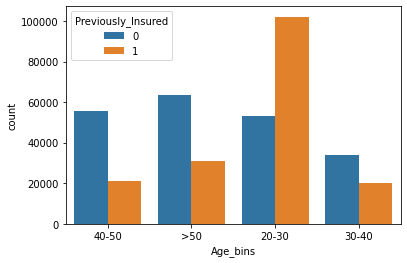

In [ ]:
sns.countplot(data = df, x = 'Age_bins', hue = 'Previously_Insured')

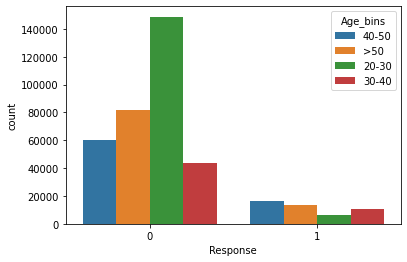

In [ ]:
#It is an imbalanced set
sns.countplot(data = df, x = 'Response', hue = 'Age_bins')

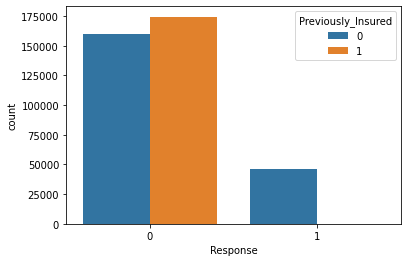

In [ ]:
sns.countplot(data = df, x = 'Response', hue = 'Previously_Insured')

158


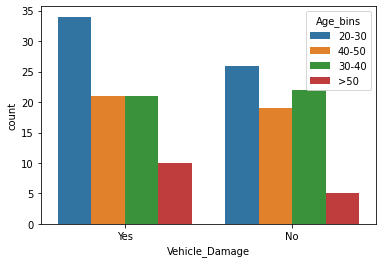

In [ ]:
# there are some who are previously insured and still take it
print(((df['Response'] == 1) & (df['Previously_Insured'] == 1)).sum())
sns.countplot(data = df[(df['Response'] == 1) & (df['Previously_Insured'] == 1)], x = 'Vehicle_Damage', hue = 'Age_bins')

In [ ]:
# No significant corr between independent variables
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [ ]:
pd.pivot_table(df, index = 'Age', values = 'Annual_Premium', columns = 'Response').head()

Response,0,1
Age,,
20,27046.162019,22647.555556
21,30642.499213,29177.574913
22,30850.230929,29945.461337
23,30710.642655,30492.345291
24,31220.565776,30186.930997


In [ ]:
pd.pivot_table(df, index = 'Vehicle_Age', values = 'Annual_Premium', columns = 'Response')

Response,0,1
Vehicle_Age,,
1-2 Year,30407.453157,31075.800264
< 1 Year,30132.903099,29827.422660
> 2 Years,34580.787528,38236.020842


In [ ]:
pd.pivot_table(df, index = ['Vehicle_Age', 'Gender'], values = 'Annual_Premium', columns = ['Response', 'Previously_Insured'])

Response                       0                           1              
Previously_Insured             0             1             0             1
Vehicle_Age Gender                                                        
1-2 Year    Female  30559.335559  30675.673749  31092.852679  29625.026316
            Male    30263.450528  30306.360582  31085.403258  24451.017544
< 1 Year    Female  28748.554567  30525.959445  29441.539171  28314.166667
            Male    28660.486488  31074.166340  30188.991248  26871.500000
> 2 Years   Female  35289.890437  25016.000000  38806.965857           NaN
            Male    34204.411665  31565.782609  37965.432662  28616.000000

In [ ]:
df['Male'] = (df['Gender'] == 'Male') * 1
df_test['Male'] = (df_test['Gender'] == 'Male') * 1
df['VehicleDamage'] = (df['Vehicle_Damage'] == 'Yes')*1
df_test['VehicleDamage'] = (df_test['Vehicle_Damage'] == 'Yes')*1

In [ ]:
#Encoding Region
region_encoder = ce.BinaryEncoder(cols = 'Region_Code')
region_encoder.fit(df['Region_Code'])
df = pd.concat([df, region_encoder.transform(df['Region_Code'])], axis = 1)

In [ ]:
#Encoding Policy Channel
Policy_Sales_Channel_encoder = ce.BinaryEncoder(cols = 'Policy_Sales_Channel')
Policy_Sales_Channel_encoder.fit(df['Policy_Sales_Channel'])
df = pd.concat([df, Policy_Sales_Channel_encoder.transform(df['Policy_Sales_Channel'])], axis = 1)

In [ ]:
df_test = pd.concat([df_test, region_encoder.transform(df_test['Region_Code'])], axis = 1)
df_test = pd.concat([df_test, Policy_Sales_Channel_encoder.transform(df_test['Policy_Sales_Channel'])], axis = 1)

In [ ]:
df = pd.get_dummies(df, prefix = 'VehicleAge', columns = ['Vehicle_Age'])
df_test = pd.get_dummies(df_test, prefix = 'VehicleAge', columns = ['Vehicle_Age'])

In [ ]:
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bins,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Policy_Sales_Channel_0,Policy_Sales_Channel_1,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_5,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Male,VehicleDamage,VehicleAge_1-2 Year,VehicleAge_< 1 Year,VehicleAge_> 2 Years
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,40-50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0,>50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,40-50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1


In [ ]:
X = df.drop(columns = ['Gender', 'Region_Code', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response', 'Age_bins'])
y = df['Response']
X_holdout_test = df_test.drop(columns = ['Gender', 'Region_Code', 'Vehicle_Damage', 'Policy_Sales_Channel'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5
[[66971     0]
 [ 9251     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66971
           1       0.00      0.00      0.00      9251

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [ ]:
print(roc_auc_score(y_test, gbc_pred))
print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

0.5001006305039246
[[66970     1]
 [ 9249     2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66971
           1       0.67      0.00      0.00      9251

    accuracy                           0.88     76222
   macro avg       0.77      0.50      0.47     76222
weighted avg       0.85      0.88      0.82     76222



In [ ]:
pred = pd.DataFrame(gbc.predict(X_holdout_test), columns = ['Response'])
pred = pd.concat([df_test['id'], pred], axis = 1)
pred.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [ ]:
from google.colab import files
pred.to_csv('submission.csv', index = False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>